## Бутстрап
Бутстрап позволяет многократно извлекать подвыборки из выборки, полученной в рамках экспериментва

В полученных подвыборках считаются статистики (среднее, медиана и т.п.)

Из статистик можно получить ее распределение и взять доверительный интервал

ЦПТ, например, не позволяет строить доверительные интервал для медианы, а бутстрэп это может сделать

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('hw_bootstrap.csv', sep = ';')

In [3]:
data.head()

,Unnamed: 0,value,experimentVariant
0,1,"10,3804953740268",Control
1,2,"9,54686666784264",Control
2,3,"11,0882146509904",Control
3,4,"10,1472740570122",Control
4,5,"9,78980767524929",Control


In [4]:
data.dtypes

Unnamed: 0            int64
value                object
experimentVariant    object
dtype: object

In [5]:
data['value'] = data.value.str.replace(',', '.')

In [6]:
data = data.astype({'value': 'float'})

In [7]:
data = data.pivot(index = 'Unnamed: 0', columns = 'experimentVariant', values = 'value').reset_index()
data.head()

experimentVariant,Unnamed: 0,Control,Treatment
0,1,10.380495,NaN
1,2,9.546867,NaN
2,3,11.088215,NaN
3,4,10.147274,NaN
4,5,9.789808,NaN


In [8]:
x = data['Control'].dropna()

In [9]:
y = data['Treatment'].dropna()

### бутстрап (с np.mean)

In [10]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

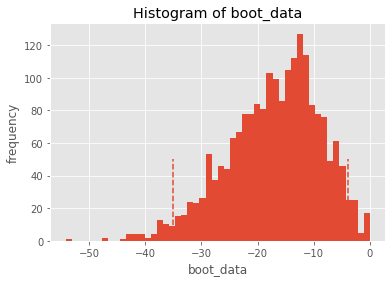

In [11]:
booted_data_mean = get_bootstrap(x, y, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [12]:
booted_data_mean["p_value"]

0.03897755842743563

In [13]:
booted_data_mean["ci"]

,0
0.025,-35.031833
0.975,-3.912174


### бутстрап (с np.median)

In [14]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/2000 [00:00<?, ?it/s]

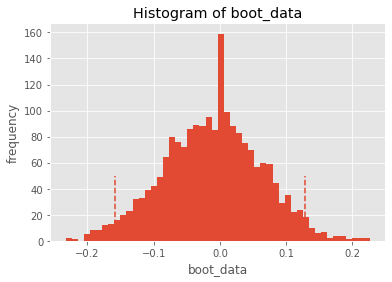

In [15]:
booted_data_median = get_bootstrap(x, y, boot_it = 2000) # в результате хранится разница двух распределений, ДИ и pvalue

In [16]:
booted_data_median["p_value"]

0.8790370642651942

In [17]:
booted_data_median["ci"]

,0
0.025,-0.158045
0.975,0.128949


### критерий mann-whitney

In [18]:
mannwhitneyu(x, y)

MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)

### Строим графики распределений

<AxesSubplot:>

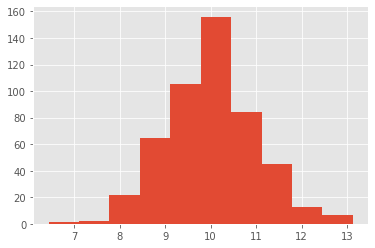

In [19]:
x.hist()

<AxesSubplot:>

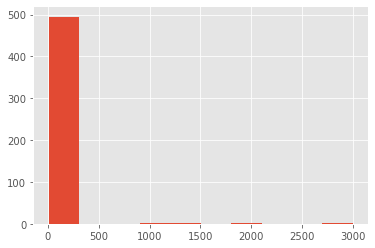

In [20]:
y.hist()

### Распределение тестовой группы не является нормальным.

# Выводы

## Итого
* Тестовая выборка имеет большие выбросы, что сильно искажает нам среднее значение
* Применяя бутстрап с оценкой среднего, мы могли бы отклонить нулевую гипотезу о равенстве средних и сделать вывод, что тестовая и контрольная выборка имеют различия
* Однако, тот же бутстрап, но уже по медиане не дает нам отклонить нулевую гипотезу, так как p-value сильно больше 0.05, т.к. здесь проверяется другая гипотеза
* U-критерий Манна-Уитни так же не дал бы нам отклонить нулевую гипотезу. Оценки pvalue так же направлены как у бутстрапирования медианы

# Способ 2 

In [21]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.median, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
    
    
    return {"p_value": p_value}

In [22]:
data = pd.read_csv('hw_bootstrap.csv',decimal= ",", sep = ';')
data.head()

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control


In [23]:
# Применение бустрап (с np.mean) и критерий mann-whitney, а потом сравнение p-value

x = data['value'][(data['experimentVariant'] == 'Control')]
y = data['value'][(data['experimentVariant'] == 'Treatment')]

res_mw = mannwhitneyu(x, y, alternative = 'two-sided')
for i in range(10):
    res_b_npmean = get_bootstrap(x, y)
    res_b_npmedian = get_bootstrap(x, y, statistic = np.median)
    
    
    print(f'Boot mean: {res_b_npmean["p_value"]}, Boot median: {res_b_npmedian["p_value"]}, MW {res_mw.pvalue}')

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.8780173162385074, Boot median: 0.8865863122898399, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.852601420972549, Boot median: 0.8579205102481263, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.9021544579955751, Boot median: 0.8647074847066867, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.8924913766740038, Boot median: 0.9354136642382487, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.9395049053791312, Boot median: 0.8577229918367062, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.8677131858014436, Boot median: 0.8703587531989804, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.8956186254078682, Boot median: 0.9068284391717093, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.9140155870150141, Boot median: 0.8817826616350197, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.864643706661616, Boot median: 0.8995578985817652, MW 0.8592148582485579


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Boot mean: 0.9039566981467002, Boot median: 0.8696781250230006, MW 0.8592148582485579
